## WeatherPy Analysis

- From the Latitude vs Temperature plot, we can see that temperature is warmer near the equator, between -20 to 20 degrees. The hottest temperature seen at this time is close to 
-20 degrees with a temperature around 100 degrees F.
- There is no strong correlation between latitude and humidity. There are several latitude points with 100% humidity. However, lowest humidity points are between 20 – 40 degrees and also -40 to -20 degrees.
- City Latitude and Wind speed do not seem to have a strong relationship either. Most of the latitudes have wind speed between 0-10 mph. However, there are several outliers of wind speed between 20-33 mph in the Northern Hemisphere, especially at latitudes 40 degrees to 70 degrees. 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Review the nearest_city function in citipy

#city = citipy.nearest_city(28,-80.6)
#city.city_name

# Review the cities list
cities

['qaanaaq',
 'sitka',
 'hithadhoo',
 'thompson',
 'souillac',
 'arraial do cabo',
 'sentyabrskiy',
 'ancud',
 'noumea',
 'atuona',
 'georgetown',
 'saraland',
 'butaritari',
 'bilma',
 'punta arenas',
 'aljezur',
 'attawapiskat',
 'hermanus',
 'busselton',
 'mentok',
 'abapo',
 'amderma',
 'kholm',
 'provideniya',
 'saint-philippe',
 'cozumel',
 'new norfolk',
 'chikoy',
 'mataura',
 'tumannyy',
 'port elizabeth',
 'puerto ayora',
 'rikitea',
 'hobyo',
 'saint george',
 'cape town',
 'albany',
 'ushuaia',
 'lorengau',
 'nalut',
 'fruitvale',
 'pocone',
 'san jose',
 'port alfred',
 'fishers',
 'tiksi',
 'sao joao da barra',
 'louisbourg',
 'castro',
 'rantoul',
 'nizhneyansk',
 'kangalassy',
 'bluff',
 'san vicente',
 'erdenet',
 'hobart',
 'hay river',
 'ujfeherto',
 'banjar',
 'ilulissat',
 'vaitupu',
 'linqing',
 'tawzar',
 'falaleu',
 'tabiauea',
 'soyo',
 'necochea',
 'mnogovershinnyy',
 'ponta do sol',
 'kapaa',
 'bairiki',
 'barentsburg',
 'stonehaven',
 'winnemucca',
 'grand ri

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Perform a weather check on each city using API Calls
# Build URL and query
url = "http://api.openweathermap.org/data/2.5/weather?"
# For temperature in Fahrenheit
city = ""
units = "imperial"


## Debugging with single city first
#city = cities[0]  
#city
#build_url = url+"appid="+api_key+"&q="+city+"&units="+units
##build_url
#json = requests.get(build_url).json()
## Get name value from json
#print(json['name'])

# Initial print
print(f"""Beginning Data Retrieval     
-----------------------------""")
# Initialize index to 1 and list to 1
city_idx = 1
set_idx = 1
# Initialize count to 0
recordcount = 1
# Initialize Data frame variables
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

#For loop for each city in the list
for city in cities:
    # For each city, get the weather data from JSON request and then print
    # Get weather data
    build_url = url+"appid="+api_key+"&q="+city+"&units="+units
    weather_response = requests.get(build_url)
    weather_json = requests.get(build_url).json()
    try:
        # Get Current City name value from the JSON data
        CurrentCity = weather_json['name']
        # Get all columns to be in data frame in List
        City.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        MaxTemp.append(weather_json['main']['temp_max'])
        WindSpeed.append(weather_json['wind']['speed'])
        # Include a print log of each city as it's being processed (with the city number and city name).
        print(f"Processing Record {city_idx} of Set {set_idx} | {CurrentCity}")
    except KeyError:
        print(f"City not found. Skipping...")
    if(recordcount<50):
        city_idx += 1
        recordcount += 1
    else:
        set_idx += 1
        city_idx = 0
        recordcount = 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Qaanaaq
Processing Record 2 of Set 1 | Sitka
Processing Record 3 of Set 1 | Hithadhoo
Processing Record 4 of Set 1 | Thompson
Processing Record 5 of Set 1 | Souillac
Processing Record 6 of Set 1 | Arraial do Cabo
City not found. Skipping...
Processing Record 8 of Set 1 | Ancud
Processing Record 9 of Set 1 | Noumea
Processing Record 10 of Set 1 | Atuona
Processing Record 11 of Set 1 | Georgetown
Processing Record 12 of Set 1 | Saraland
Processing Record 13 of Set 1 | Butaritari
Processing Record 14 of Set 1 | Bilma
Processing Record 15 of Set 1 | Punta Arenas
Processing Record 16 of Set 1 | Aljezur
City not found. Skipping...
Processing Record 18 of Set 1 | Hermanus
Processing Record 19 of Set 1 | Busselton
City not found. Skipping...
Processing Record 21 of Set 1 | Abapo
City not found. Skipping...
Processing Record 23 of Set 1 | Kholm
Processing Record 24 of Set 1 | Provideniya
Processing Record

## Convert Raw Data to DataFrame
* Export the city data into a .csv.

* Display the DataFrame

In [5]:
### Convert Raw Data to DataFrame

# Debug
#weather_json['name']
#weather_json['wind']['speed']
#weather_json['speed']
#weather_json
#summary = ["name","country","dt"]
#weather_json2 = [response(*summary) for response in weather_json]

# Extract required columns from JSON data
# Create a Pandas DataFrame with the results
weather_data = pd.DataFrame(
{
 'City':City,
 'Cloudiness':Cloudiness,
 'Country':Country,
 'Date':Date,
 'Humidity':Humidity,
 'Lat':Lat,
 'Lng':Lng,
 'Max Temp':MaxTemp,
 'Wind Speed':WindSpeed
})

# Export the city data into a .csv.
# Need OS module to create new directory,and need encoding to convert to csv file
if("output_data"==False):
    os.mkdir('output_data')
weather_data.to_csv(output_data_file, encoding='utf-8', index=False)

# Display the DataFrame
weather_data.count()
#weather_json

City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

In [6]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,0,GL,1540694609,100,77.48,-69.36,-7.88,9.64
1,Sitka,0,US,1540694610,44,37.17,-99.65,56.30,8.19
2,Hithadhoo,92,MV,1540694610,100,-0.60,73.08,78.03,8.75
3,Thompson,75,CA,1540692000,98,55.74,-97.86,32.00,8.05
4,Souillac,0,FR,1540693800,80,45.60,-0.60,39.20,9.17


In [7]:
# Cell to get current date to be used in graphs below
import datetime

now = datetime.datetime.now()
CurrentDate = now.strftime("%Y-%m-%d")
print(CurrentDate)

2018-10-27


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

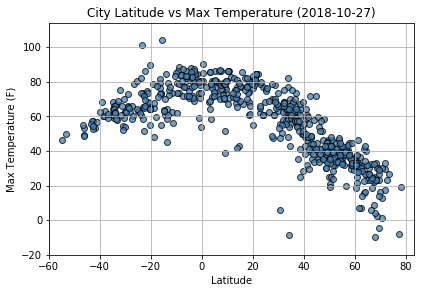

In [8]:
# Plot Lat and Max Temp
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Plot limits
plt.xlim(min(Lat)-5,max(Lat)+5)
plt.ylim(min(MaxTemp)-10,max(MaxTemp)+10)

plt.grid()
plt.tight_layout()
plt.title(f"City Latitude vs Max Temperature ({CurrentDate})")
plt.scatter(Lat,MaxTemp,marker="o",facecolors="steelblue",alpha=0.75,edgecolors='black')
plt.savefig("output_data/LatTemp.png")

#### Latitude vs. Humidity Plot

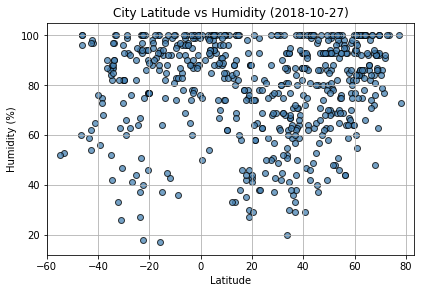

In [9]:
# Plot Lat and Humidity
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Plot limits
plt.xlim(min(Lat)-5,max(Lat)+5)
plt.ylim(min(Humidity)-5,max(Humidity)+5)

plt.grid()
plt.tight_layout()
plt.title(f"City Latitude vs Humidity ({CurrentDate})")
plt.scatter(Lat,Humidity,marker="o",facecolors="steelblue",alpha=0.75,edgecolors='black')
plt.savefig("output_data/LatHumid.png")

#### Latitude vs. Cloudiness Plot

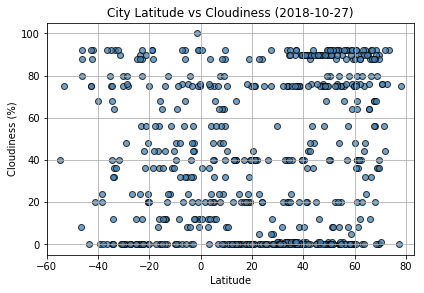

In [10]:
# Plot Lat and Humidity
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Plot limits
plt.xlim(min(Lat)-5,max(Lat)+5)
plt.ylim(min(Cloudiness)-5,max(Cloudiness)+5)

plt.grid()
plt.tight_layout()
plt.title(f"City Latitude vs Cloudiness ({CurrentDate})")
plt.scatter(Lat,Cloudiness,marker="o",facecolors="steelblue",alpha=0.75,edgecolors='black')
plt.savefig("output_data/LatCloud.png")

#### Latitude vs. Wind Speed Plot

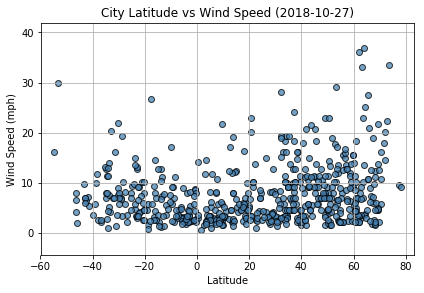

In [11]:
# Plot Lat and Humidity
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Plot limits
plt.xlim(min(Lat)-5,max(Lat)+5)
plt.ylim(min(WindSpeed)-5,max(WindSpeed)+5)

plt.grid()
plt.tight_layout()
plt.title(f"City Latitude vs Wind Speed ({CurrentDate})")
plt.scatter(Lat,WindSpeed,marker="o",facecolors="steelblue",alpha=0.75,edgecolors='black')
plt.savefig("output_data/LatWind.png")